In [1]:
import zipfile

zip = "../archive(1).zip"
with zipfile.ZipFile(zip, "r") as archive:
    archive.extractall()


In [2]:
import pathlib

data_dir = pathlib.Path("Cars Dataset")
new_data_dir = pathlib.Path("Car Images")

if not new_data_dir.exists():
    new_data_dir.mkdir()

train_dir = data_dir / "train"
test_dir = data_dir / "test"
new_train_dir = new_data_dir / "train"
new_test_dir = new_data_dir / "test"

if not new_train_dir.exists():
    new_train_dir.mkdir()
if not new_test_dir.exists():
    new_test_dir.mkdir()



In [ ]:
for dir in [train_dir, test_dir]:
    for subdir in dir.iterdir():
        if subdir.is_dir():
            for file in subdir.iterdir():
                if file.is_file() and file.suffix == ".jpg":
                    file.rename((new_test_dir if dir == test_dir else new_train_dir) / f"{subdir.name}_{file.name}")

The Images arent the same shape, need to figure out some shape which they follow as well as find out a good transform

In [13]:
import torch
from torchvision import datasets, transforms

In [5]:
import pandas as pd
import PIL
from PIL import Image

columns = {"image": [], "height": [], "width": [], "label": []}
for dir in [train_dir, test_dir]:
    for subdir in dir.iterdir():
        if subdir.is_dir():
            for file in subdir.iterdir():
                if file.is_file() and file.suffix == ".jpg":
                    with Image.open(file) as img:
                        width, height = img.size
                    columns["image"].append(file.name)
                    columns["height"].append(height)
                    columns["width"].append(width)
                    columns["label"].append(subdir.name)

df = pd.DataFrame(columns)

In [10]:
df

,image,height,width,label
0,326.jpg,182,278,Audi
1,1.jpg,168,300,Audi
2,10.jpg,183,275,Audi
3,100.jpg,168,300,Audi
4,1001.jpg,194,259,Audi
...,...,...,...,...
4160,985.jpg,163,309,Toyota Innova
4161,99.jpg,194,259,Toyota Innova
4162,992.jpg,168,300,Toyota Innova
4163,994.jpg,168,300,Toyota Innova


In [35]:
df['height'].mean(), df['width'].mean(), df['height'].std(), df['width'].std()

(np.float64(181.48883553421368),
 np.float64(279.79159663865545),
 np.float64(21.84399500732421),
 np.float64(29.788362949561062))

In [51]:
img_transforms = transforms.Compose([
    RandomCropWithDynamicPad((256, 256)),
    transforms.TrivialAugmentWide(),
    transforms.Resize((64, 64)),
    transforms.ToTensor(),
])

In [52]:
test_dataset = datasets.ImageFolder(test_dir, transform=img_transforms)

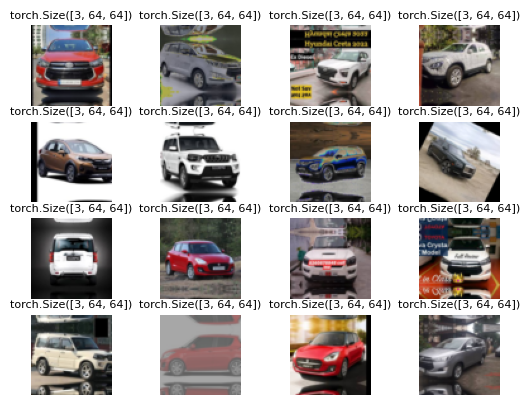

In [62]:
# img, label = next(iter(test_dataset))
# img = img[:16]
import matplotlib.pyplot as plt
import random


img = []
label = []
for i in range(16):
    index = random.randint(0, len(test_dataset) - 1)
    img.append(test_dataset[index][0])
    label.append(test_dataset[index][1])

for i in range(16):
    # print(f"Image shape: {img[i].shape}")
    plt.subplot(4, 4, i + 1)
    plt.imshow(img[i].permute(1, 2, 0))
    plt.title(f"{img[i].shape}", fontsize=8)
    plt.axis('off')
plt.show()